In [10]:
## Tutorial: Transforming between coordinate systems
## From: http://learn.astropy.org/rst-tutorials/Coordinates-Transform.html?highlight=filtertutorials
## This code should allow me to transform between any coordinate systems I might need
from urllib.parse import urlencode
from urllib.request import urlretrieve

# Third-party dependencies
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
import numpy as np
from IPython.display import Image

from astropy.coordinates import EarthLocation
from astropy.time import Time

In [21]:
# Set up matplotlib and use a nicer set of plot parameters
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)
%matplotlib inline

# Import skymap and some of it's basic map classes
import skymap

ModuleNotFoundError: No module named 'skymap'

In [1]:
## If we enter it in the more "human" format it will have the same result
hcg7_center = SkyCoord('0h39m15.9s', '0d53m17.016s', frame='icrs')  # passing in string format
print(hcg7_center)

NameError: name 'SkyCoord' is not defined

In [12]:
Winona = EarthLocation(lat='44.0554d', lon='-91.6664', height=202*u.m)

In [14]:
from astropy.coordinates import AltAz

## Full information for observation at this time and place
aa = AltAz(location=Winona, obstime=observing_time)

In [15]:
## Define time for observation
observing_time = Time('2010-12-21 1:00')

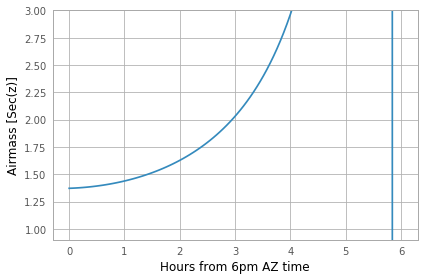

In [19]:
# this gives a Time object with an *array* of times
delta_hours = np.linspace(0, 6, 100)*u.hour
full_night_times = observing_time + delta_hours
full_night_aa_frames = AltAz(location=Winona, obstime=full_night_times)
full_night_aa_coos = hcg7_center.transform_to(full_night_aa_frames)

plt.plot(delta_hours, full_night_aa_coos.secz)
plt.xlabel('Hours from 6pm AZ time')
plt.ylabel('Airmass [Sec(z)]')
plt.ylim(0.9,3)
plt.tight_layout()

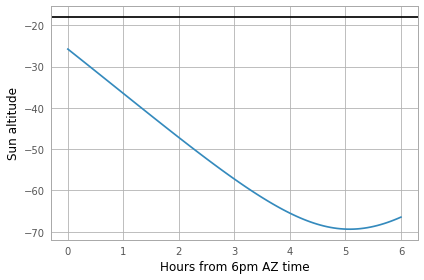

In [20]:
from astropy.coordinates import get_sun

full_night_sun_coos = get_sun(full_night_times).transform_to(full_night_aa_frames)
plt.plot(delta_hours, full_night_sun_coos.alt.deg)
plt.axhline(-18, color='k')
plt.xlabel('Hours from 6pm AZ time')
plt.ylabel('Sun altitude')
plt.tight_layout()